
### Predicting Sales - Walmart Store Sale
#### Mulubrhan Gebrekidan


#### Data Prep 

In [3]:
# Importing Libararies
import pandas as pd
import os


In [4]:
# Checking Current Working directory
cwd = os.getcwd() 
print("Current working directory:", cwd) 

Current working directory: C:\Users\muluf


In [5]:
# Importing Data
df = pd.read_csv("Walmart_Sales.csv")

In [7]:
# Checking Dat
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
#Checking Size
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
# Checking the Data Size
df.size

51480

In [12]:
# Get Genrenal Information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
# Converting the data type for Date Columns from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\muluf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muluf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muluf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\muluf\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [15]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
# Checkig for Duplicates
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


In [21]:
# Quick Check on the data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


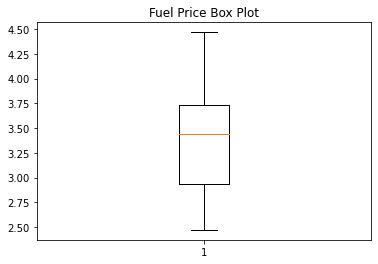

In [29]:
# Creating Box plot to visualize distribution 
# Importing library 
import matplotlib.pyplot as plt

# Creating box plots for all columns
plt.boxplot(df['Fuel_Price'])
plt.title('Fuel Price Box Plot')
plt.show()


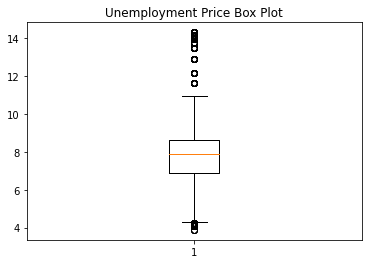

In [30]:
# Creating Box plot to visualize distribution 
# Importing library 
import matplotlib.pyplot as plt

# Creating box plots for all columns
plt.boxplot(df['Unemployment'])
plt.title('Unemployment Price Box Plot')
plt.show()


In [42]:
# Detecting Outliers
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers



In [43]:
# usage:

outliers = detect_outliers_iqr(df)

for col, outlier_df in outliers.items():
    print(f"Outliers in column {col}:")
   

Outliers in column Store:
Outliers in column Weekly_Sales:
Outliers in column Holiday_Flag:
Outliers in column Temperature:
Outliers in column Fuel_Price:
Outliers in column CPI:
Outliers in column Unemployment:


In [44]:
# Printing Outliers
outlier_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
555,4,2012-06-07,2224499.28,0,80.37,3.187,130.719633,4.077
556,4,2012-07-13,2100252.61,0,76.86,3.224,130.683000,4.077
557,4,2012-07-20,2175563.69,0,79.14,3.263,130.701290,4.077
558,4,2012-07-27,2048613.65,0,81.06,3.356,130.719581,4.077
559,4,2012-03-08,2174514.13,0,83.86,3.374,130.737871,4.077


In [45]:
outlier_df.shape

(481, 8)

In [48]:
#Excluding Outliers
df_2 = df[~df.index.isin(outlier_df.index)]


In [49]:
df_2.shape

(5954, 8)

In [50]:
df.shape

(6435, 8)

### EDA

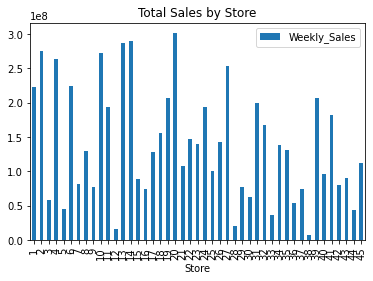

In [53]:
# Bivariant Anlysis
# Stores and Sales 


# Group by 'Store' and calculate the sum of 'Weekly Sale'
grouped_Store_df = df_2.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Plot the bar graph
grouped_Store_df.plot.bar(x='Store', y='Weekly_Sales')
plt.title('Total Sales by Store')
plt.show()

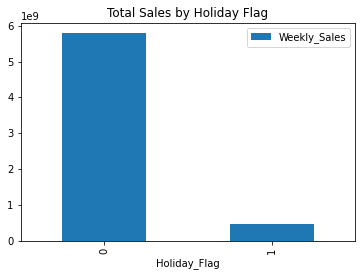

In [55]:
# Holiday Flag and Sales
# Group by 'Holiday Flag' and calculate the sum of 'Weekly Sale'
grouped_HF_df = df_2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

# Plot the bar graph
grouped_HF_df.plot.bar(x='Holiday_Flag', y='Weekly_Sales')
plt.title('Total Sales by Holiday Flag')
plt.show()

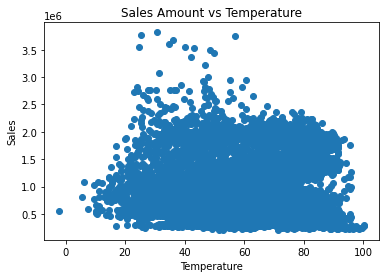

In [57]:
## Temperature and Sales
# Create scatter plot
# Create the scatter plot
plt.scatter(df_2['Temperature'], df_2['Weekly_Sales'])

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Sales Amount vs Temperature')

# Show the plot
plt.show()

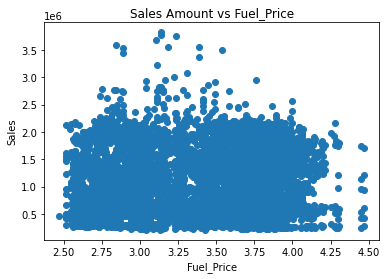

In [58]:
## Fuel Price and Sales

# Create the scatter plot
plt.scatter(df_2['Fuel_Price'], df_2['Weekly_Sales'])

# Add labels and title
plt.xlabel('Fuel_Price')
plt.ylabel('Sales')
plt.title('Sales Amount vs Fuel_Price')

# Show the plot
plt.show()

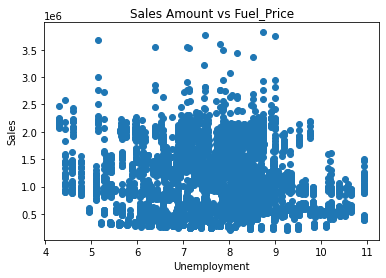

In [59]:
## Unemployment and Sales

# Create the scatter plot
plt.scatter(df_2['Unemployment'], df_2['Weekly_Sales'])

# Add labels and title
plt.xlabel('Unemployment')
plt.ylabel('Sales')
plt.title('Sales Amount vs Fuel_Price')

# Show the plot
plt.show()

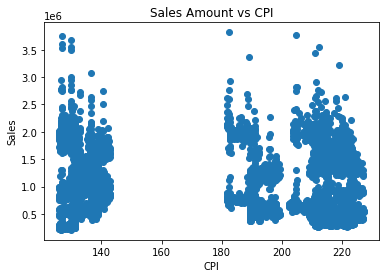

In [60]:
# CPI and Sales 

plt.scatter(df_2['CPI'], df_2['Weekly_Sales'])

# Add labels and title
plt.xlabel('CPI')
plt.ylabel('Sales')
plt.title('Sales Amount vs CPI')

# Show the plot
plt.show()

C:\Users\muluf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                 Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store         1.000000     -0.321986      0.000616    -0.022126    0.049860   
Weekly_Sales -0.321986      1.000000      0.036725    -0.061389    0.011257   
Holiday_Flag  0.000616      0.036725      1.000000    -0.156881   -0.076853   
Temperature  -0.022126     -0.061389     -0.156881     1.000000    0.147560   
Fuel_Price    0.049860      0.011257     -0.076853     0.147560    1.000000   
CPI          -0.205025     -0.087443     -0.003215     0.218762   -0.142689   
Unemployment  0.309472     -0.074999      0.009751     0.026236   -0.104268   

                   CPI  Unemployment  
Store        -0.205025      0.309472  
Weekly_Sales -0.087443     -0.074999  
Holiday_Flag -0.003215      0.009751  
Temperature   0.218762      0.026236  
Fuel_Price   -0.142689     -0.104268  
CPI           1.000000     -0.216206  
Unemployment -0.216206      1.000000  


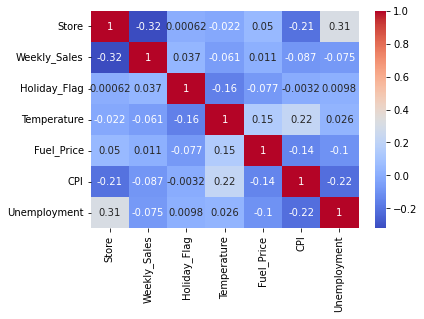

In [63]:
#correlation matrix
# Import Seaborn library for ploting 
import seaborn as sns
corr_matrix = df_2.corr()
print(correlation_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [65]:
# Predictive Anlysis 
# Multiple Linear Regression
# Identifying X and Y Varibles

#Setting the value for X and Y
x = df_2[['Store', 'Holiday_Flag', 'Temperature','Fuel_Price','CPI','Unemployment']]
y = df_2['Weekly_Sales']


In [66]:
# Splitting the data to test and train set
# Installing Skllearn
!pip install scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\muluf\\AppData\\Local\\Temp\\pip-uninstall-7s3kik_d\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4



Consider using the `--user` option or check the permissions.



In [67]:
# Importing Sklearn
import sklearn

In [68]:
# Importing train test split 
from sklearn.model_selection import train_test_split

In [70]:
# Splitting data to test and Trainf 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
#Fitting the Multiple Linear Regression model to the training data set
# Importing the linear regression model 
from sklearn.linear_model import LinearRegression
#defining the model
mlr = LinearRegression()  
# Fiting the model on the trainign data set
mlr.fit(x_train, y_train)

LinearRegression()

In [72]:
# Geting the Coefficent 
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  1727694.7573245284
Coefficients:


[('Store', -15274.88748271289),
 ('Holiday_Flag', 71450.2809374752),
 ('Temperature', -737.4133935914286),
 ('Fuel_Price', 28605.157860271524),
 ('CPI', -2175.7964975514474),
 ('Unemployment', -485.68845726363753)]

In [73]:
# Testing the model 
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)

In [75]:
# Testing the Actual value vs the predicted value
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
4352,1408464.08,8.373564e+05
4560,1141184.66,8.551046e+05
2109,561137.06,1.283466e+06
5079,377464.62,7.440889e+05
1391,1867403.01,1.347093e+06


In [77]:
# Model Evaluation
#Model Evaluation
# Importing libraries
from sklearn import metrics
import numpy as np

# Defining Mean Absolute Error and Mean Square Error 
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 13.04
Mean Absolute Error: 437082.23300650646
Mean Square Error: 277916390197.3805
Root Mean Square Error: 527177.7595815101


In [78]:
## Gradinet Boosting 
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [92]:
# Gradient Boosting Regressor
# Defining the parameter 
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
}

In [83]:
# Fiting gradient boosting model to the training set
# Importing Libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score



In [93]:
# Fitting Gradient Bossting Regressor to the train data 
gbr = GradientBoostingRegressor(**params)
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [94]:
# Make a prediction on the test data
y_pred = gbr.predict(x_test)

In [95]:
# # Evaluating model performance
from sklearn.metrics import mean_squared_error
mse_gbr = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gbr}")

Gradient Boosting Regressor Mean Squared Error: 33089898951.458176


In [101]:
#Setting another set for X and Y values
x_2 = df_2[['CPI','Unemployment','Temperature']]
y_2 = df_2['Weekly_Sales']

In [102]:
# Splitting the data set again
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

In [103]:
# Fitting the gradient Boosting Model again on the second data set
gbr.fit(x_train_2, y_train_2)

GradientBoostingRegressor()

In [104]:
# Make a prediction on the test data
y_pred_2 = gbr.predict(x_test_2)



In [105]:
# Evaluating gbr model performance on the second data set
mse_gbr_2 = mean_squared_error(y_test_2, y_pred_2)
print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gbr_2}")

Gradient Boosting Regressor Mean Squared Error: 251073927435.90817
